## Universidad de los Andes

## Programa de Maestria MINE

## Ciencia de Datos Aplicada

**Taller 1**

Como parte del ejercicio de evaluación de proyectos inmobiliarios para diversificar la inversión de la compañía en Buenos Aires, se ha generado una evaluación de los inmuebles presentes en AirBnb para el último periodo con el propósito de encontrar hallazgos claves para la toma de decisiones de inversión en finca raíz. 

Dicho ejercicio se toma citando elementos del profesor Fabian Peña, Docente de CDA en Uniandes 
datascience-uniandes/eda-tutorial. (2023). GitHub. https://github.com/datascience-uniandes/eda-tutorial/tree/master

Y también citando algunos elementos del trabajo de Yildirim (2021)
Yildirim, S. (2023). Data Cleaning and EDA on Airbnb Dataset with Python, Pandas, and Seaborn. https://towardsdatascience.com/data-cleaning-and-eda-on-airbnb-dataset-with-python-pandas-and-seaborn-7c276116b650


**Selección del Dataset de Trabajo**

De esta manera, se ha tomado una base de 26.204 inmuebles en la que se hará un EDA preliminar para establecer posibles relaciones entre los datos que den primeras luces como información relevante para el análisis. Vale la pena resaltar que el mercado inmobiliario de Buenos Aires está caracterizado por un impacto creciente de registro de propiedades (Cerca de 25 mil unidades) y un apetito de los empresarios en Argentina que se no se comporta de manera diferente: Según Mariano Gubitosi (Infobae, 2023) "Los alquileres temporales resultan atractivos dado que los perfiles de rentabilidad del modelo de arrendamientos puede estar cerca del 9% anual"

Generamos la importación de las librerías que utilizaremos en nuestro análisis:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


Importamos también el archivo correspondiente a la ciudad de Buenos Aires, con corte a junio de 2023 en sus datos:

In [18]:
listings_df = pd.read_csv("./listings.csv.gz")
listings_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20230628025456,2023-06-29,city scrape,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,LUXURIOUS 1 BDRM APT- POOL/ GYM/ SPA/ 24-HR SE...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within an hour,100%,79%,t,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1,2,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.581840,-58.424150,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared pool"", ""Hot water"", ""Shared sauna"", ""...","$17,339.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,21,51,208,2023-06-29,36,8,0,2012-07-02,2023-05-13,4.81,4.94,4.89,4.91,4.97,4.94,4.89,NaN,f,1,1,0,0,0.27
1,14222,https://www.airbnb.com/rooms/14222,20230628025456,2023-06-28,city scrape,Rental unit in Palermo/Buenos Aires · ★4.78 · ...,Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,NaN,9,11,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.586170,-58.410360,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Hot water"", ""Paid parking off premises"", ""TV...","$7,807.00",7,365,7,7,365,365,7.0,365.0,NaN,t,0,0,0,261,2023-06-28,108,11,0,2012-07-10,2023-04-20,4.78,4.75,4.78,4.80,4.90,4.89,4.75,NaN,f,6,6,0,0,0.81
2,206738,https://www.airbnb.com/rooms/206738,20230628025456,2023-06-29,city scrape,Rental unit in Buenos Aires · ★4.71 · 3 bedroo...,Recently renovated 3 bedroom apartment in Pale...,Palermo is fortunate to have great transport l...,https://a0.muscache.com/pictures/8b3b1257-fe36...,1011896,https://www.airbnb.com/users/show/1011896,Natalia,2011-08-23,"Buenos Aires, Argentina",mi nombre es Natalia recibimos a la gente en ...,within an hour,100%,89%,f,https://a0.muscache.com/im/pictures/user/a28a8...,https://a0.muscache.com/im/pictures/user/a28a8...,Palermo,11,15,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.578190,-58.429640,Entire rental unit,Entire home/apt,9,NaN,1 bath,3.0,4.0,"[""Children\u2019s books and toys"", ""Fire extin...","$61,868.00",1,365,1,2,365,365,1.3,365.0,NaN,t,29,59,89,364,2023-06-29,43,1,0,2011-11-

**Estrategia de Análisis**

Con base en el dataframe escogida y su explicación previa, se buscará ahondar en una estrategia de estadística descriptiva univariada y multivariada para generar hallazgos que permitan tomar decisiones de inversión. Se utilizarán técnicas de estadística descriptiva y de inferencia estadística para tal fin.

A priori se buscarán establecer relaciones de cara al precio y su relación con la ocupación de los inmuebles, por lo que el deseable de la investigación es encontrar las caracterísiticas del inmueble que más se traduzcan en oportunidades de inversión para la compañía. Así, es posible inclusive generar opciones de inversión según el perfil de riesgo del inversionista, en donde datos que más se repiten pueden estar asociados a un perfil bajo de riesgo y a medida que nos acercamos a los outliers del dataframe, inducir ventajas a partir de la estadística descriptiva para inversión de medio o alto riesgo.

De manera operativa, haremos cálculos a través de conteo, características de distribución, análisis gráficos, correlaciones estadísticas, entre otras que serán descritas a medida que se vaya avanzando.

Definimos el precio de arriendo del inmueble a partir de la ayuda de código encontrada:

In [19]:
rental_price = listings_df.loc[:, 'price']

Con los comandos más comunes de cara al EDA en Pandas, es posible observar algunas características de los datos que permiten dimensionar el dataframe que vamos a analizar. El conjunto de datos de BBAA corresponde a 26.204 observaciones de inmuebles para arriendo con un total de 77 atributos de diversas características tomadas de la interfaz de Airbnb para la ciudad en cuestión. Se describe también el tipo de variables que se tienen en cuenta en la misma base.

In [20]:
listings_df.shape

(26204, 75)

In [21]:
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

Basados en Yildirim (2021) se observan algunas relaciones que vale la pena tener en cuenta a la hora de generar relaciones. En particular, se busca establecer la relación entre el precio y la tasa de respuesta del anfitrión, así como la tasa de aceptación

In [22]:
listings_df[
    ["price","host_response_rate","host_acceptance_rate"]
].dtypes

price                   object
host_response_rate      object
host_acceptance_rate    object
dtype: object

Validamos que los formatos estén correctos buscando eliminar algunos tipos de formato que invalidan el correcto funcionamiento de los comandos, reemplazando elementos en las observaciones y definiendo las variables de tipo "float". De la misma manera se busca que el campo "bathrooms_text" sea legible a través de las fórmulas entregadas.

In [23]:
listings_df[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

,price,host_response_rate,host_acceptance_rate
0,"$17,339.00",100%,79%
1,"$7,807.00",100%,100%
2,"$61,868.00",100%,89%
3,"$15,330.00",100%,99%
4,"$20,381.00",NaN,0%


In [24]:
listings_df["price"] = listings_df["price"].str[1:].str.replace(",","").astype("float")
listings_df["host_response_rate"] = listings_df["host_response_rate"].str[:-1].astype("float") / 100
listings_df["host_acceptance_rate"] = listings_df["host_acceptance_rate"].str[:-1].astype("float") / 100

In [25]:
listings_df[["bathrooms_text"]].head()

,bathrooms_text
0,1 bath
1,1 bath
2,1 bath
3,1 bath
4,1 bath


In [27]:
listings_df["bathroom_qty"] = listings_df["bathrooms_text"].str.split(" ", expand=True)[0]
listings_df["bathroom_type"] = listings_df["bathrooms_text"].str.split(" ", expand=True)[1]


**Desarrollo de la Estrategia**

Como parte del entendimiento de los datos, se escogerán 5 atributos que son importantes a la hora de tomar decisiones de inversión en Buenos Aires. A saber, se tomarán las variables de precio, disponibilidad a 30,60,90 y 365 días, reviews mensuales, vecindario.

Cerca del 50% de la oferta de los inmuebles está en las provincias de Palermo, Recoleta y San Nicolás.
El 90% de los inmuebles en oferta son hogares enteros, a diferencia de las categorías de habitación privada, compartida o cuarto de hotel.
El 66% de las unidades pertenecen a una unidad de renta completa, seguido del 12% que corresponde un condominio completo.
El 70% de las unidades tienen acomodación hasta para 3 personas.
El 90% de las unidades tienen máximo hasta 2 baños en sus acomodaciones.
El 90% de los inmuebles tienen máximo 3 habitaciones.

In [29]:
listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

neighbourhood_cleansed
Palermo              0.335827
Recoleta             0.148565
San Nicolas          0.058731
Belgrano             0.054076
Retiro               0.047703
Monserrat            0.039879
Almagro              0.035605
Villa Crespo         0.033964
Balvanera            0.032323
San Telmo            0.027057
Colegiales           0.023775
Nuñez                0.022935
Caballito            0.019577
Chacarita            0.016448
Constitucion         0.012784
Villa Urquiza        0.012365
Puerto Madero        0.011410
Barracas             0.007823
Saavedra             0.007174
San Cristobal        0.005305
Flores               0.004732
Villa Ortuzar        0.003969
Coghlan              0.003587
Villa Devoto         0.003473
Boca                 0.003358
Boedo                0.003244
Villa Del Parque     0.003129
Parque Chacabuco     0.002595
Parque Patricios     0.002557
Parque Chas          0.002328
Villa Pueyrredon     0.002061
Paternal             0.001565
Agronomia        

In [30]:
listings_df["property_type"].value_counts(dropna=False, normalize=True)

property_type
Entire rental unit                    0.664631
Entire condo                          0.126278
Private room in rental unit           0.037361
Entire serviced apartment             0.036521
Entire loft                           0.028278
Private room in home                  0.020989
Entire home                           0.017936
Entire vacation home                  0.017822
Private room in condo                 0.007213
Private room in casa particular       0.004160
Room in hotel                         0.003320
Private room in bed and breakfast     0.003129
Private room in serviced apartment    0.002671
Shared room in rental unit            0.002328
Shared room in home                   0.002290
Room in boutique hotel                0.002061
Private room in townhouse             0.001946
Casa particular                       0.001679
Private room in villa                 0.001679
Room in bed and breakfast             0.001603
Entire townhouse                      0.001412

In [31]:
listings_df["room_type"].value_counts(dropna=False, normalize=True)

room_type
Entire home/apt    0.898947
Private room       0.089414
Shared room        0.007861
Hotel room         0.003778
Name: proportion, dtype: float64

In [32]:
listings_df["accommodates"].value_counts(dropna=False, normalize=True)

accommodates
2     0.485308
4     0.200656
3     0.181385
1     0.052931
5     0.036368
6     0.026561
8     0.004770
7     0.004389
16    0.001946
10    0.001641
9     0.001336
12    0.000878
14    0.000611
15    0.000611
11    0.000458
13    0.000153
Name: proportion, dtype: float64

In [33]:
listings_df["bathrooms_text"].value_counts(dropna=False, normalize=True)

bathrooms_text
1 bath               0.688635
1.5 baths            0.115555
2 baths              0.072279
1 shared bath        0.032094
1 private bath       0.020417
2.5 baths            0.020264
3 baths              0.009770
1.5 shared baths     0.008854
2 shared baths       0.007861
3.5 baths            0.004465
3 shared baths       0.004160
2.5 shared baths     0.002710
4 baths              0.002099
4.5 baths            0.000992
5 baths              0.000992
4 shared baths       0.000916
NaN                  0.000878
3.5 shared baths     0.000840
0 shared baths       0.000649
5 shared baths       0.000611
6 baths              0.000611
Half-bath            0.000534
0 baths              0.000496
6.5 shared baths     0.000420
6 shared baths       0.000382
7 baths              0.000267
Shared half-bath     0.000267
5.5 baths            0.000229
9 baths              0.000229
8 baths              0.000229
8.5 shared baths     0.000191
4.5 shared baths     0.000153
6.5 baths            0.00

In [34]:
listings_df["beds"].value_counts(dropna=False, normalize=True)

beds
1.0     0.513242
2.0     0.246527
3.0     0.140589
4.0     0.054343
5.0     0.017555
NaN     0.009388
6.0     0.007785
7.0     0.002404
8.0     0.001984
9.0     0.001221
10.0    0.001107
14.0    0.000954
16.0    0.000725
11.0    0.000496
12.0    0.000382
15.0    0.000305
13.0    0.000114
23.0    0.000114
20.0    0.000114
19.0    0.000114
18.0    0.000076
25.0    0.000038
28.0    0.000038
31.0    0.000038
17.0    0.000038
33.0    0.000038
44.0    0.000038
30.0    0.000038
32.0    0.000038
22.0    0.000038
70.0    0.000038
26.0    0.000038
27.0    0.000038
Name: proportion, dtype: float64

In [35]:
listings_df["amenities"].value_counts(dropna=False, normalize=True)

amenities
["Wifi", "TV", "Air conditioning", "Kitchen"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              0.005610
["Air conditioning", "Kitchen", "TV", "Wifi", "Washer"]                                                                                                                                                                                                                                                                                                   

Utilizaremos de la misma manera algunas librerías para poder generar gráficos que den una ayuda desde el análisis visual. Porsupuesto, una de las variables más importantes a nivel de los inmuebles es la variable precio, que buscaremos graficar a través de un suavizamiento de su serie a través de una transformación logarítmica que permita aislar el efecto de datos atípicos del análisis visual.

In [36]:
import seaborn as sns
sns.set_theme(font_scale=1.5, style="darkgrid")

In [41]:
q1 = listings_df["price"].quantile(0.25)
q3 = listings_df["price"].quantile(0.75)
iqr = q3 - q1

[]

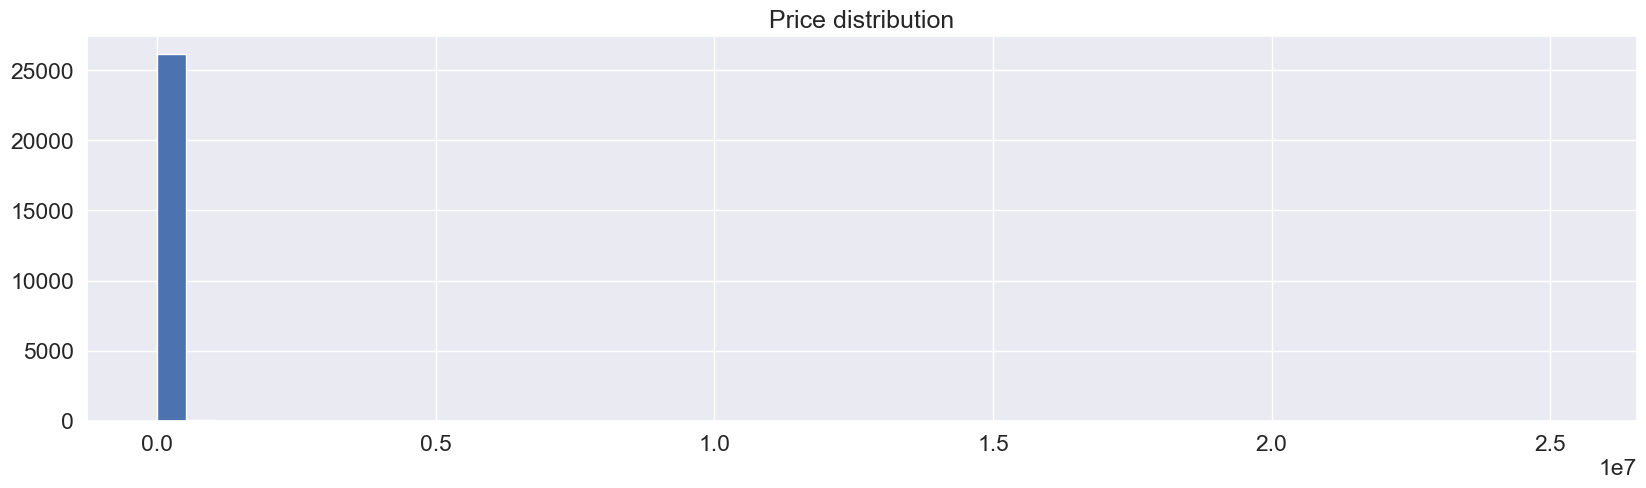

In [42]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price"], bins=50)
plt.title("Price distribution")
plt.plot()

[]

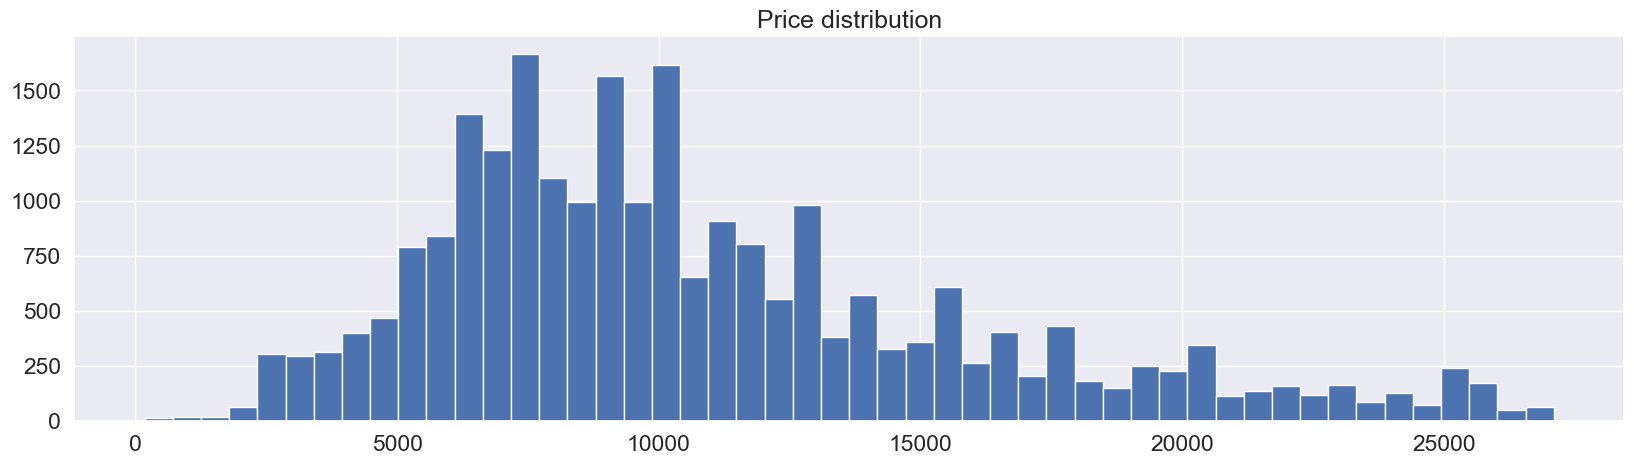

In [43]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price"] <= (q3 + 1.5 * iqr)]["price"], bins=50)
plt.title("Price distribution")
plt.plot()

c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


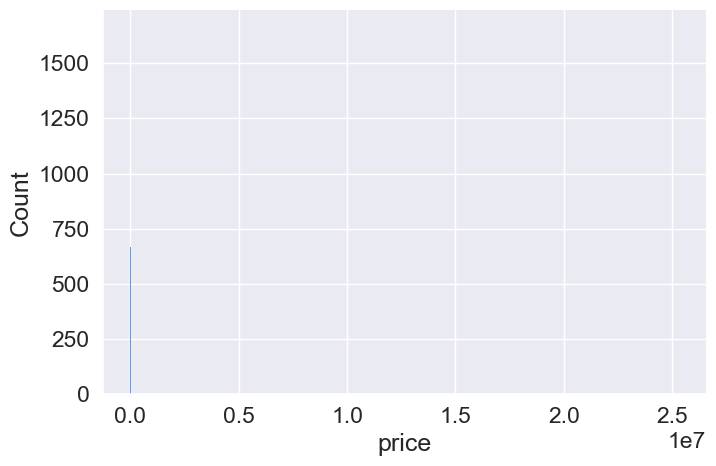

In [37]:
sns.displot(data=listings_df, x="price", kind="hist", aspect=1.5)

c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


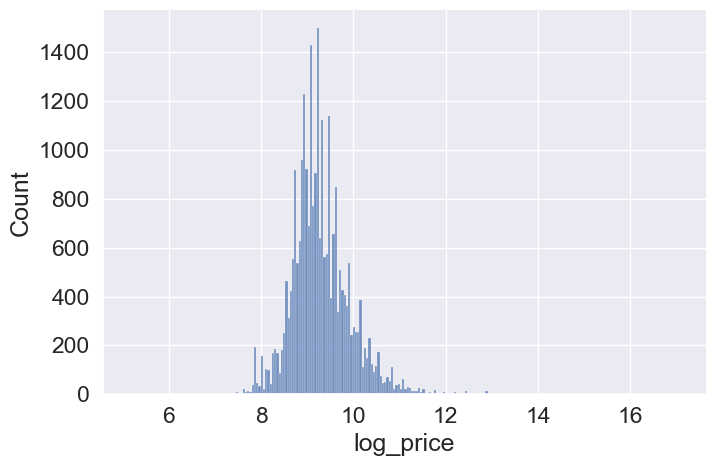

In [38]:
listings = listings_df[listings_df.price!=0]
listings.loc[:,"log_price"] = np.log(listings.loc[:,"price"])
sns.displot(data=listings, x="log_price", kind="hist", aspect=1.5)

In [44]:
listings.groupby(
    ["host_identity_verified"], 
    as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,host_identity_verified,avg_price,qty
0,f,42355.688525,1342
1,t,16189.252474,24862


In [45]:
listings.groupby(
    ["host_response_time"], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)


,host_response_time,avg_price,qty
0,a few days or more,24519.239163,669
1,within a day,18484.092835,1605
2,within a few hours,14850.199124,3425
3,within an hour,14706.514757,16534


c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


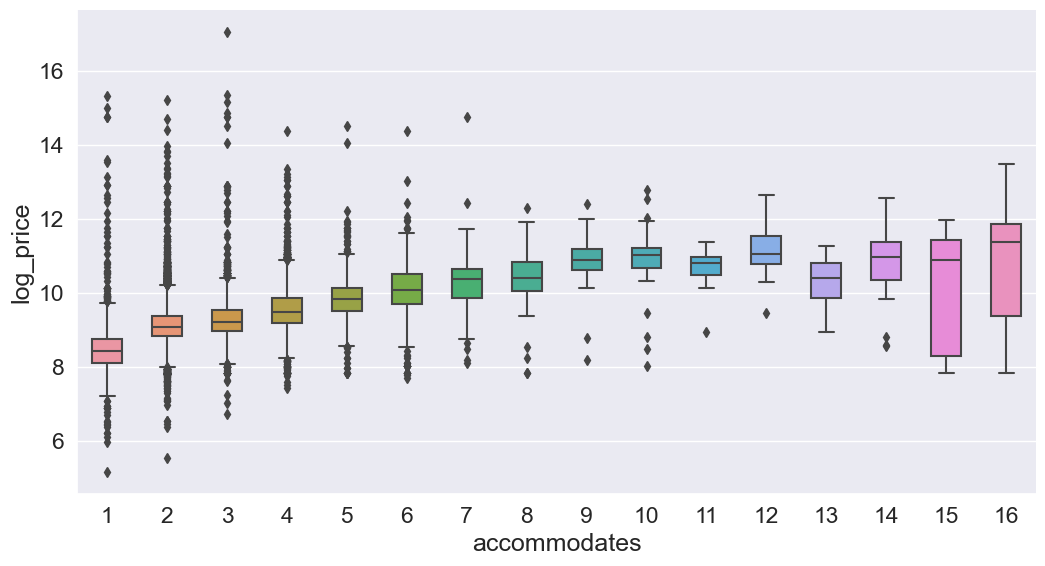

In [46]:
sns.catplot(
    data=listings, 
    x='accommodates', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [47]:
listings_df[[ 
    'availability_30', 'availability_60', 
    'availability_90', 'availability_365',
    'price'
]].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.905705,0.822588,0.404077,-0.005658
availability_60,0.905705,1.000000,0.966118,0.500140,-0.011079
availability_90,0.822588,0.966118,1.000000,0.548973,-0.014351
availability_365,0.404077,0.500140,0.548973,1.000000,-0.009376
price,-0.005658,-0.011079,-0.014351,-0.009376,1.000000


In [48]:
listings.groupby(
    ['instant_bookable'], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,instant_bookable,avg_price,qty
0,f,18392.082931,18449
1,t,15476.852482,7755


c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


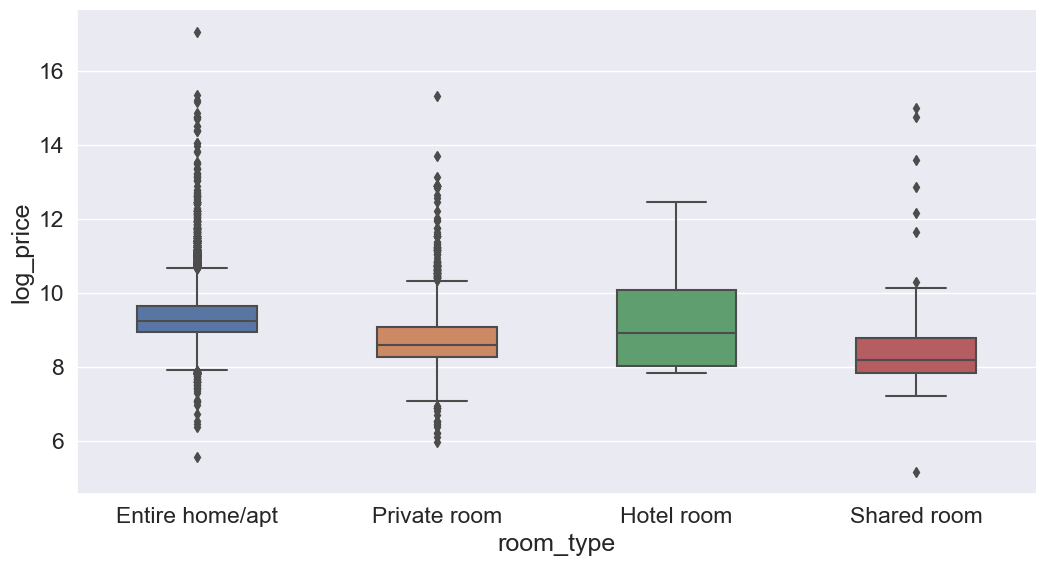

In [49]:
sns.catplot(
    data=listings, 
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [55]:
listings_sample_df =  listings_df.loc[listings_df["price"] <= (q3 + 1.5 * iqr)].sample(frac=0.1)
listings_sample_df.shape

(2415, 77)

In [58]:
listings_df.loc[:,"has_coffee_maker"] = ['coffee maker' in row.lower() for row in listings_df.amenities]

In [59]:
listings_df.has_coffee_maker.value_counts()

has_coffee_maker
True     15743
False    10461
Name: count, dtype: int64

In [60]:
listings_df.groupby(
    ["has_coffee_maker"]
).agg(
    avg_price = ("price", "mean")
)

,avg_price
has_coffee_maker,
False,17607.141765
True,17477.623007


In [72]:
rental_price = listings_df.loc[:, 'price']

In [73]:
mean_rent = np.mean(rental_price)
print('The average rental price is: $', round(mean_rent, 2))

The average rental price is: $ 17529.33


In [74]:
max_rent = np.max(rental_price)
print('The maximum rental price is: $', round(max_rent, 2))

The maximum rental price is: $ 25295088.0


In [75]:
min_rent = np.min(rental_price)
print('The minimum rental price is: $', round(min_rent, 2))


The minimum rental price is: $ 175.0


In [76]:
rent_std = np.std(rental_price)
print('The standard deviation of rental prices is: $', round(rent_std, 2))

The standard deviation of rental prices is: $ 175398.42


In [77]:
median_rent = np.median(rental_price)
print('The median rental price is: $', round(median_rent, 2))

The median rental price is: $ 10190.0


In [78]:
# Assigning variable
region = listings_df.loc[:, 'neighbourhood_cleansed']

In [79]:
# Extracting unique values from the variable
unique_regions = pd.unique(region)
print('Number of distinct regions:', unique_regions)

Number of distinct regions: ['Palermo' 'Recoleta' 'Nuñez' 'Monserrat' 'Balvanera' 'Retiro'
 'Constitucion' 'Barracas' 'San Nicolas' 'Chacarita' 'Almagro'
 'Puerto Madero' 'Villa Crespo' 'Belgrano' 'Coghlan' 'Parque Chacabuco'
 'San Cristobal' 'Villa Urquiza' 'San Telmo' 'Boedo' 'Colegiales' 'Boca'
 'Caballito' 'Villa Luro' 'Villa Devoto' 'Saavedra' 'Flores'
 'Monte Castro' 'Villa Ortuzar' 'Villa Gral. Mitre' 'Velez Sarsfield'
 'Parque Patricios' 'Villa Del Parque' 'Floresta' 'Paternal'
 'Villa Pueyrredon' 'Villa Santa Rita' 'Liniers' 'Agronomia'
 'Parque Avellaneda' 'Villa Real' 'Parque Chas' 'Villa Lugano' 'Versalles'
 'Nueva Pompeya' 'Villa Riachuelo' 'Villa Soldati' 'Mataderos']


In [80]:
unique_regions_count = listings_df['neighbourhood_cleansed'].value_counts().count()
print('Number of distinct regions:', unique_regions_count)

Number of distinct regions: 48


In [82]:
listings_df.corr(method='pearson', min_periods=1, numeric_only=True)

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_coffee_maker,Air conditioning,Air_conditioning,Hot water,Hot_water
id,1.000000,NaN,0.364938,0.065188,0.156222,0.086184,0.060928,NaN,0.013763,-0.060125,0.020357,NaN,-0.054477,-0.033800,-0.012533,-0.082978,-0.156288,-0.085290,-0.085094,0.015534,0.015534,-0.084515,0.015534,NaN,0.137332,0.180725,0.197949,0.166590,-0.382951,-0.149242,0.107279,0.058402,-0.000327,0.072500,-0.043130,-0.035480,-0.043662,0.026379,0.102392,0.106506,-0.007364,0.016842,0.377780,-0.081260,NaN,NaN,NaN,NaN
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.364938,NaN,1.000000,-0.026578,0.055294,-0.078626,-0.085521,NaN,-0.050394,-0.000417,-0.015731,NaN,-0.062810,-0.031474,0.004292,-0.049017,-0.074463,-0.051971,-0.053099,0.030756,0.030756,-0.052388,0.030756,NaN,0.047787,0.057612,0.058388,0.043228,-0.168949,-0.016211,0.061900,0.007774,-0.024533,0.013654,-0.038022,-0.045122,-0.036424,0.006847,-0.145521,-0.145709,-0.001439,0.013149,0.199196,-0.107985,NaN,NaN,NaN,NaN
host_response_rate,0.065188,NaN,-0.026578,1.000000,0.460703,0.067881,0.055343,NaN,0.039914,0.019300,0.029351,NaN,-0.026158,0.008406,-0.030212,-0.043122,-0.002212,-0.047303,-0.038746,0.004873,0.004873,-0.041784,0.004873,NaN,0.006231,0.056633,0.083191,0.078025,0.100286,0.156838,0.148860,0.134507,0.083934,0.100694,0.075894,0.077839,0.072708,0.075793,0.104588,0.105475,0.004173,0.007830,0.157135,0.152642,NaN,NaN,NaN,NaN
host_acceptance_rate,0.156222,NaN,0.055294,0.460703,1.000000,0.070549,0.055006,NaN,0.037616,0.036186,0.043482,NaN,-0.019972,0.004156,-0.005695,-0.072598,-0.009520,-0.079275,-0.066529,-0.001418,-0.001418,-0.070619,-0.001418,NaN,-0.028012,0.041202,0.074182,0.072468,0.173768,0.285678,0.254224,0.094917,0.043134,0.081053,0.017040,0.024531,0.019818,0.048160,0.113847,0.114927,-0.002133,0.017767,0.307101,0.160597,NaN,NaN,NaN,NaN
host_listings_count,0.086184,NaN,-0.078626,0.067881,0.070549,1.000000,0.964902,NaN,0.019036,0.039910,0.046634,NaN,0.016572,0.044014,0.029289,-0.021519,0.004588,-0.024093,-0.020808,-0.003967,-0.003967,-0.021428,-0.003967,NaN,0.071526,0.072572,0.069092,0.050159,-0.035555,0.017883,0.003302,-0.097551,-0.109770,-0.072498,-0.144557,-0.159686,-0.038984,-0.148082,0.677226,0.669346,0.191944,0.011365,0.072648,0.010286,NaN,NaN,NaN,NaN
host_total_listings_count,0.060928,NaN,-0.085521,0.055343,0.055006,0.964902,1.000000,NaN,0.014617,0.035946,0.041879,NaN,0.016280,0.040583,0.033613,-0.014041,0.008999,-0.016117,-0.009208,-0.003860,-0.003860,-0.011567,-0.003860,NaN,0.057816,0.055233,0.050812,0.053078,-0.035999,0.003407,-0.006120,-0.095054,-0.107210,-0.072132,-0.139353,-0.153837,-0.041214,-0.150024,0.562882,0.555382,0.180166,0.002453,0.047334,0.003195,NaN,NaN,NaN,NaN
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.013763,NaN,-0.050394,0.039914,0.037616,0.019036,0.014617,NaN,1.000000,-0.555226,0.007784,NaN,-0.

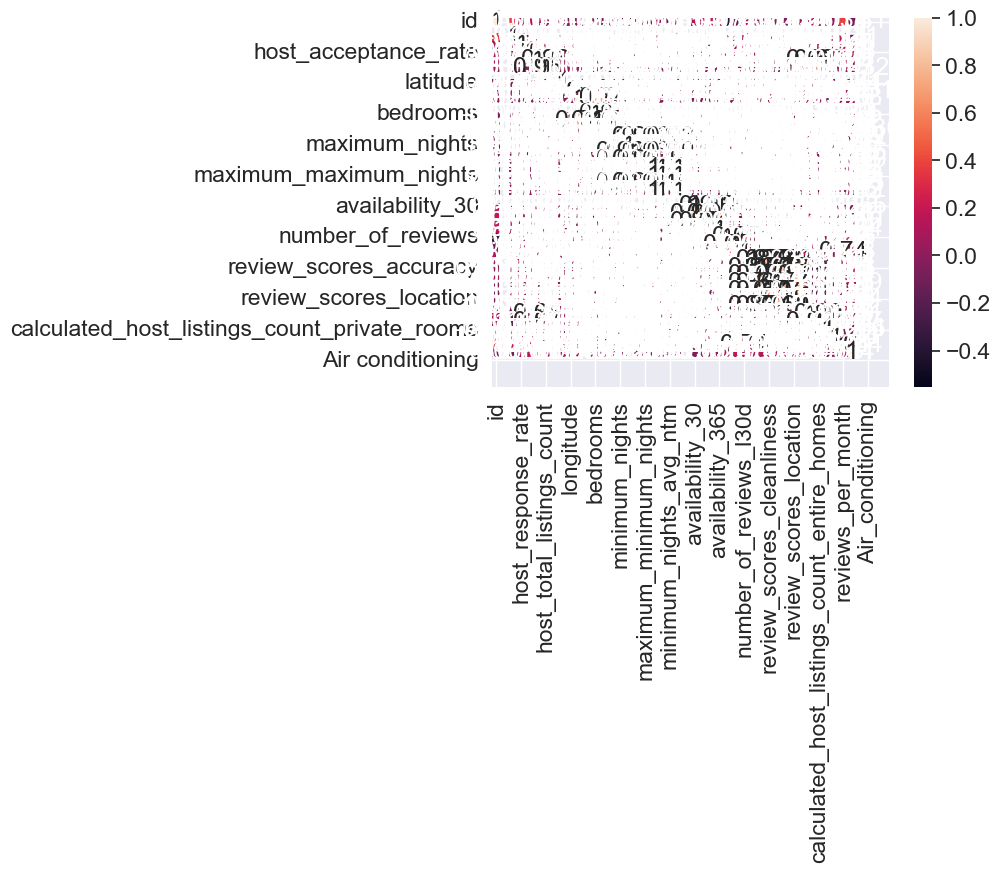

In [83]:
sns.heatmap(listings_df.corr(method='pearson', min_periods=1, numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (100,40)

plt.show()

Se generó un diagrama de correlación entre los diferentes reviews de los inmuebles. Sin embargo, desde el análisis empírico no se incluye en el documento dado que no son variables que a priori incidan en el precio del inmueble.

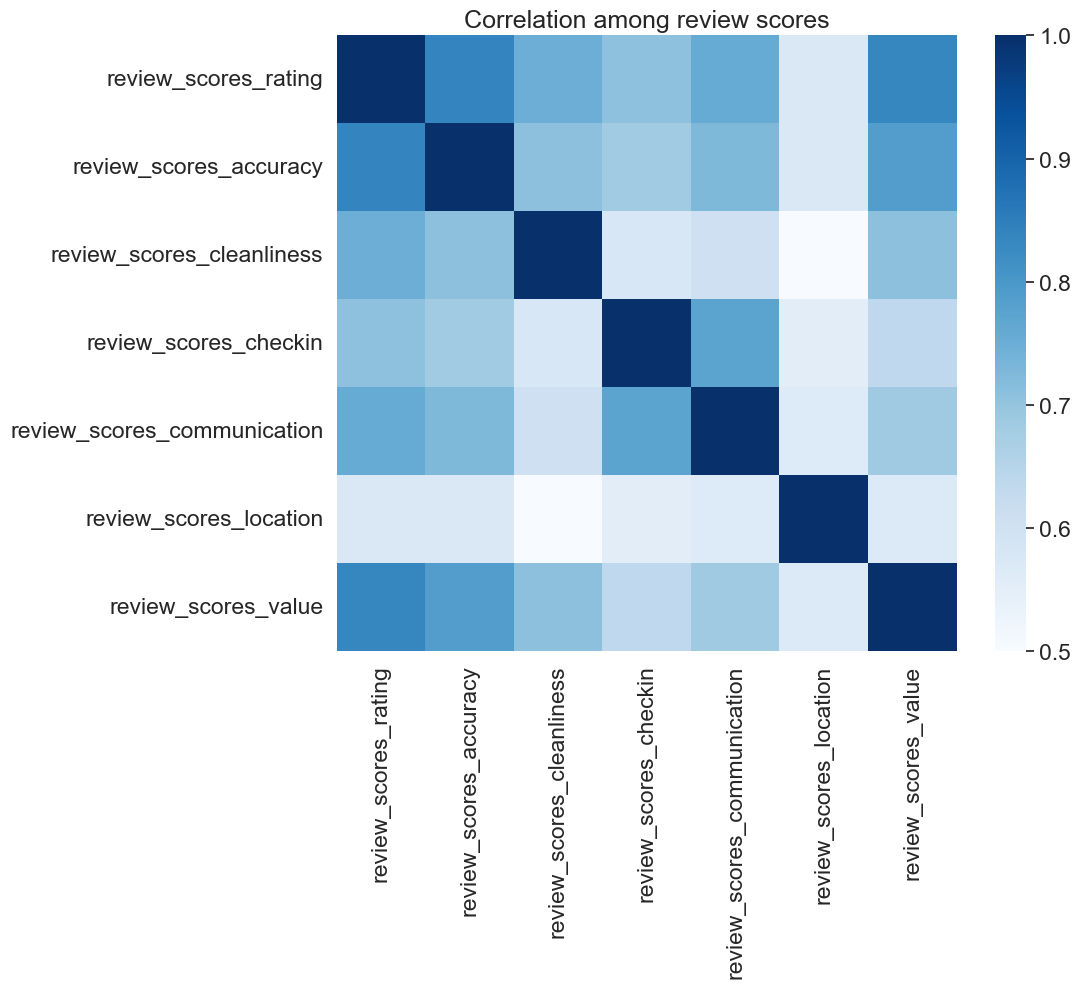

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()